In [1]:
from datetime import datetime 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn as sns 

In [2]:
microsoft = pd.read_csv('MicrosoftStock.csv') 
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [3]:
microsoft.shape

(1259, 8)

In [4]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [5]:
microsoft.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


Exploratory Data Analysis

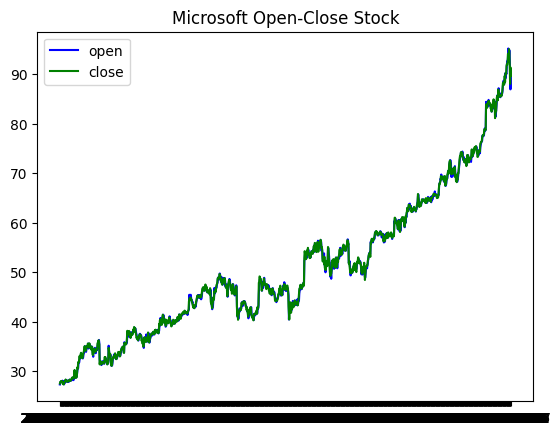

In [6]:
plt.plot(microsoft['date'], 
         microsoft['open'], 
         color="blue", 
         label="open") 
plt.plot(microsoft['date'], 
         microsoft['close'], 
         color="green", 
         label="close") 
plt.title("Microsoft Open-Close Stock") 
plt.legend()

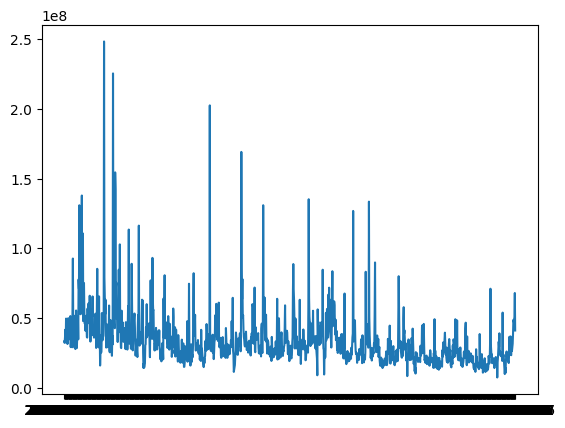

In [7]:
plt.plot(microsoft['date'], 
         microsoft['volume']) 
plt.show()

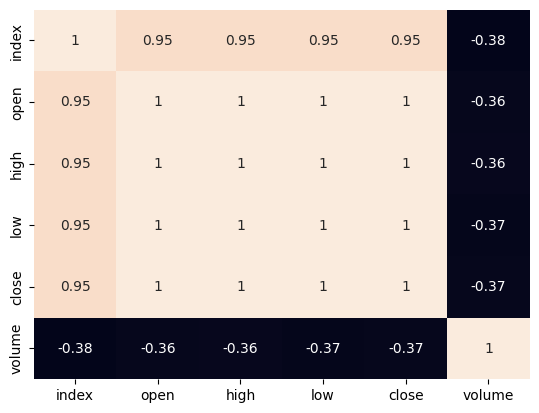

In [10]:
# Ensure only numeric columns are used for correlation
microsoft_numeric = microsoft.select_dtypes(include=['number'])  # Select numeric columns only
microsoft_numeric = microsoft_numeric.dropna()  # Optionally drop rows with NaN values

# Generate and show the heatmap
sns.heatmap(microsoft_numeric.corr(), annot=True, cbar=False)
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Prices')

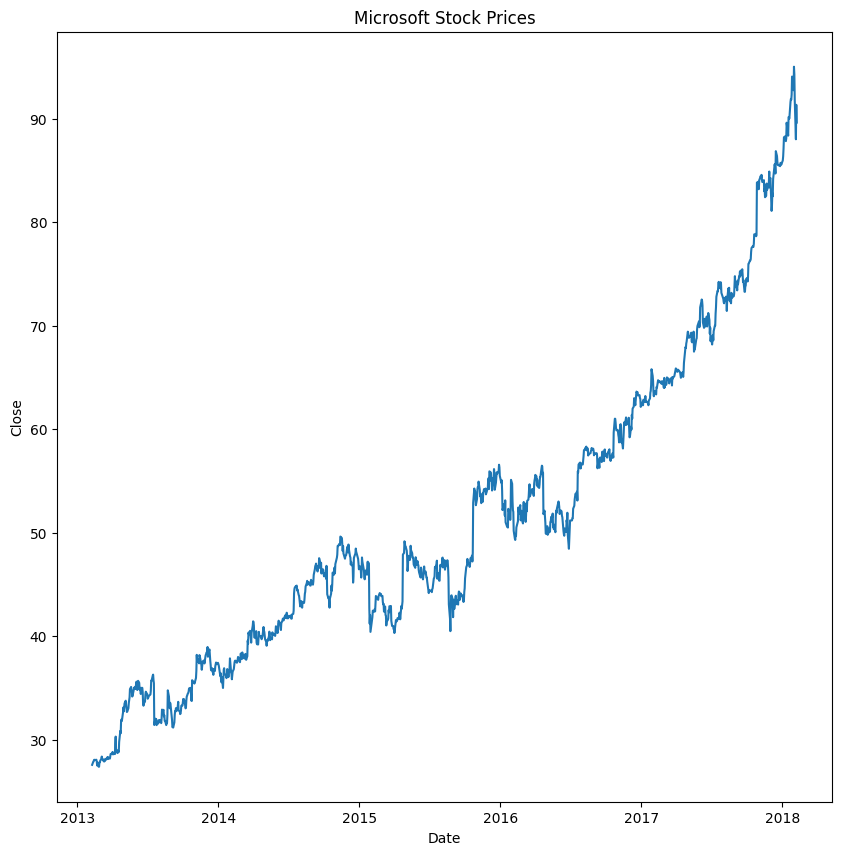

In [11]:
microsoft['date'] = pd.to_datetime(microsoft['date']) 
prediction = microsoft.loc[(microsoft['date'] 
                            > datetime(2013, 1, 1)) 
                            & (microsoft['date'] 
                            < datetime(2018, 1, 1))] 
  
plt.figure(figsize=(10, 10)) 
plt.plot(microsoft['date'], microsoft['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Microsoft Stock Prices")

In [14]:
# Prepare the training set samples
msft_close = microsoft.filter(['close'])  # Filter the 'close' column
dataset = msft_close.values  # Convert to numpy array
training = int(np.ceil(len(dataset) * 0.95))  # 95% for training

# Scale the data using StandardScaler
scaler = StandardScaler()  # Renaming variable to avoid conflict
scaled_data = scaler.fit_transform(dataset)  # Apply scaling

train_data = scaled_data[0:int(training), :]  # Training data

x_train = []  # Input features
y_train = []  # Target values

# Create the X_train and y_train using a sliding window of 60
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Using 60 previous time steps for the feature
    y_train.append(train_data[i, 0])  # Current value is the target

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM (samples, timesteps, features)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Optionally, check the shape of X_train
print(X_train.shape)

(1137, 60, 1)


Build the Model

In [15]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                            return_sequences=True, 
                            input_shape 
                            =(X_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(128)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
  
print(model.summary()) 

C:\Users\Sciddhanto\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


Compile and Fit
While compiling a model we provide these three essential parameters:

1) optimizer – This is the method that helps to optimize the cost function by using gradient descent.
2) loss – The loss function by which we monitor whether the model is improving with training or not.
3) metrics – This helps to evaluate the model by predicting the training and the validation data.

In [18]:
from keras.metrics import RootMeanSquaredError 

model.compile(optimizer='adam', 
              loss='mae', 
              metrics=[RootMeanSquaredError()])  # Wrap the metric in a list

history = model.fit(X_train, y_train, epochs=20)



Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2948 - root_mean_squared_error: 0.4196
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1109 - root_mean_squared_error: 0.1493
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0963 - root_mean_squared_error: 0.1331
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0990 - root_mean_squared_error: 0.1359
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0887 - root_mean_squared_error: 0.1182
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0951 - root_mean_squared_error: 0.1297
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0900 - root_mean_squared_error: 0.1216
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0803 - root_mean_squared_error: 0.1081
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0889 - root_mean_squared_error: 0.1202
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0775 - root_mean_squared_error: 0.1079

Model Evaluation

In [20]:
# Ensure the data is scaled first
scaler = StandardScaler()
ss = scaler.fit_transform(dataset)  # Scale the dataset

# Prepare the testing data
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]  # The actual values for testing

# Create the X_test and y_test using a sliding window of 60
for i in range(60, len(testing)):
    x_test.append(testing[i - 60:i, 0])

x_test = np.array(x_test)

# Reshape X_test for model input (samples, timesteps, features)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions using the trained model
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


C:\Users\Sciddhanto\AppData\Local\Temp\ipykernel_206204\2560789145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


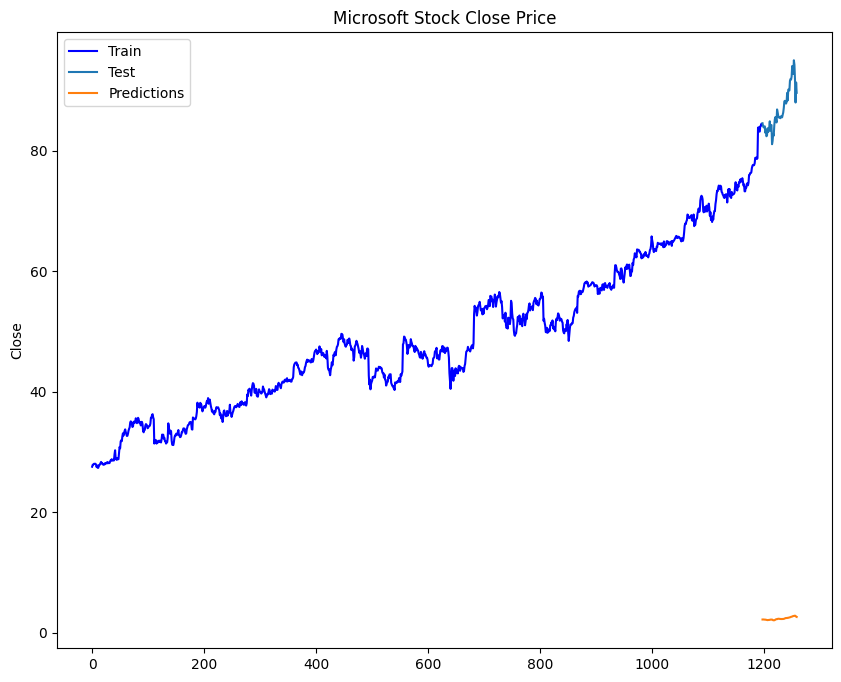

In [21]:
train = microsoft[:training] 
test = microsoft[training:] 
test['Predictions'] = pred 
  
plt.figure(figsize=(10, 8)) 
plt.plot(train['close'], c="b") 
plt.plot(test[['close', 'Predictions']]) 
plt.title('Microsoft Stock Close Price') 
plt.ylabel("Close") 
plt.legend(['Train', 'Test', 'Predictions']) 